<div dir = 'rtl'>

**فهرست مطالب**<a id='toc0_'></a>    
- [<div dir='rtl'> نمایش رگرسیون لوژستیک</div>](#toc1_)    
  - [<div dir='rtl'> کتابخانه های لازم </div>](#toc1_1_)    
  - [<div dir='rtl'>فراخوانی دیتا</div>](#toc1_2_)    
  - [<div dir='rtl'>آماده سازی دیتا</div>](#toc1_3_)    
  - [<div dir='rtl'>تقسیم داده ها </div>](#toc1_4_)    
  - [<div dir='rtl'>انتخاب مدل </div>](#toc1_5_)    
  - [<div dir='rtl'>برازش مدل</div>](#toc1_6_)    
  - [<div dir='rtl'>پیش بینی مقادیر تست</div>](#toc1_7_)    
  - [<div dir='rtl'>بررسی دقت مدل</div>](#toc1_8_)    
  - [<div dir='rtl'>ضرایب مدل</div>](#toc1_9_)    
  - [<div dir='rtl'>رگرسیون لوژستیک با استفاده از کتابخانه <code>statsmodels</code></div>](#toc1_10_)    
  - [<div dir='rtl'>رسم نمودار رگرسیون لوژستیک با استفاده از دو ویژگی </div>](#toc1_11_)    
  - [<div dir='rtl'>رسم نمودار رگرسیون لوژستیک با استفاده از سه ویژگی </div>](#toc1_12_)    
- [<div dir='rtl'>نیوتن رافسون</div>](#toc2_)    
  - [<div dir='rtl'>بارگزاری دیتا</div>](#toc2_1_)    
  - [<div dir='rtl'>تقسیم داده ها </div>](#toc2_2_)    
  - [<div dir='rtl'> </div>](#toc2_3_)    
    - [**فرمول تابع سیگموید**](#toc2_3_1_)    
    - [**وظیفه تابع سیگموید**](#toc2_3_2_)    
    - [**عملکرد کد**](#toc2_3_3_)    
    - [**کاربردها**](#toc2_3_4_)    
  - [<div dir='rtl'>توضیح تابع نیوتن رافسون </div>](#toc2_4_)    
  - [<div dir='rtl'>اجرا</div>](#toc2_5_)    
- [<div dir = 'rtl'>مقایسه الگوریتم های رگرسیون لوژستیک ، درخت تصمیم ،<code>KNN</code>و <code>SVM</code></div>](#toc3_)    
  - [<div dir = 'rtl'>فراخوانی داده ها</div>](#toc3_1_)    
  - [<div dir = 'rtl'>تقسیم داده ها به دو بخش آموزش و تست </div>](#toc3_2_)    
  - [<div dir ='rtl'>استاندارد کردن متغیر های ورودی</div>](#toc3_3_)    
  - [<div dir = 'rtl'> پیدا کردن بهترین مقدار <code>K</code> برای الگوریتم <code>KNN</code></div>](#toc3_4_)    
  - [<div dir ='rtl'>تعریف مدل های مورد بررسی</div>](#toc3_5_)    
  - [<div dir = 'rtl'>برازش مدل های مورد بررسی و مقایسه دقت آنان و رسم منحنی <code>ROC</code></div>](#toc3_6_)    
  - [<div dir = 'rtl'>رسم درخت تصمیم </div>](#toc3_7_)    
- [<div dir ='rtl'>معیار های سنجش مدل </div >](#toc4_)    
    - [AIC (Akaike Information Criterion)](#toc4_1_1_)    
    - [BIC (Bayesian Information Criterion)](#toc4_1_2_)    
    - [**درست‌نمایی چیست؟**](#toc4_1_3_)    
    - [**چرا Log-Likelihood (LL) استفاده می‌شود؟**](#toc4_1_4_)    
    - [**محاسبه Log-Likelihood (LL)**](#toc4_1_5_)    
    - [**نقش Log-Likelihood در انتخاب مدل**](#toc4_1_6_)    
    - [ **جمع‌بندی**](#toc4_1_7_)    
- [مقدمه هوش مصنوعی](#toc5_)    
    - [ نورون مصنوعی و محاسبات](#toc5_1_1_)    
      - [ساختار یک نورون:](#toc5_1_1_1_)    
      - [فرمول ریاضی نورون:](#toc5_1_1_2_)    
      - [مثال عددی:](#toc5_1_1_3_)    
    - [ لایهها و معماری شبکه](#toc5_1_2_)    
      - [**الف) لایه ورودی (Input Layer):**](#toc5_1_2_1_)    
      - [**ب) لایههای پنهان (Hidden Layers):**](#toc5_1_2_2_)    
      - [**ج) لایه خروجی (Output Layer):**](#toc5_1_2_3_)    
    - [**فرآیند یادگیری**](#toc5_1_3_)    
      - [**الف) پیشبینی (Forward Pass):**](#toc5_1_3_1_)    
      - [**ب) محاسبه خطا (Loss Function):**](#toc5_1_3_2_)    
      - [**ج) پسانتشار خطا (Backpropagation):**](#toc5_1_3_3_)    
      - [**د) بهروزرسانی وزنها (Gradient Descent):**](#toc5_1_3_4_)    
      - [**ه) تکرار (Epochs):**](#toc5_1_3_5_)    
    - [**توابع فعالسازی**](#toc5_1_4_)    
      - [**الف) تابع Sigmoid:**](#toc5_1_4_1_)    
      - [**ب) تابع ReLU (Rectified Linear Unit):**](#toc5_1_4_2_)    
      - [**ج) تابع Softmax:**](#toc5_1_4_3_)    
    - [**انواع شبکههای عصبی**](#toc5_1_5_)    
      - [**الف) MLP (پرسپترون چندلایه):**](#toc5_1_5_1_)    
      - [**ب) CNN (شبکه کانولوشنی):**](#toc5_1_5_2_)    
      - [**ج) RNN (شبکه بازگشتی):**](#toc5_1_5_3_)    
      - [**د) Transformers:**](#toc5_1_5_4_)    
    - [**چالشها و محدودیتها**](#toc5_1_6_)    
    - [**جمع بندی و پیشنهادات**](#toc5_1_7_)    
- [<div dir = 'rtl'>خوشه بندی </div>](#toc6_)    
  - [<div dir ='rtl'> بارگیری داده ها </div>](#toc6_1_)    
  - [<div dir ='rtl'>تابع elbow</div>](#toc6_2_)    
  - [**مقایسه دو روش**](#toc6_3_)    
  - [**نتیجه‌گیری**](#toc6_4_)    
  - [<div dir ='rtl'>الگوریتم K-means</div>](#toc6_5_)    
    - [**مراحل اجرای K-Means: یک بالهٔ محاسباتی**](#toc6_5_1_)    
    - [**نقاط قوت K-Means**:](#toc6_5_2_)    
    - [**چالشهای K-Means**:](#toc6_5_3_)    
    - [**کاربردهای K-Means در جهان واقعی**:](#toc6_5_4_)    
  - [<div dir ='rtl'> تحلیل الگوریتم K-Medoids و پیاده‌سازی آن</div>](#toc6_6_)    
  - [<div dir ='rtl'>تحلیل الگوریتم BIRCH و پیاده‌سازی آن</div>](#toc6_7_)    
  - [<div dir ='rtl'> تحلیل الگوریتم DBSCAN و پیاده‌سازی آن](#toc6_8_)    
  - [<div dir ='rtl'> تحلیل الگوریتم OPTICS و پیاده‌سازی آن</div>](#toc6_9_)    
- [<div dir='rtl'>BN learn</div>](#toc7_)    
- [<div dir='rtl'>دیتاست کوچک</div>](#toc8_)    
- [<div dir='rtl'>دیتاست متوسط</div>](#toc9_)    
- [<div dir='rtl'>دیتاست بزرگ</div>](#toc10_)    


</div>
<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[<div dir='rtl'> نمایش رگرسیون لوژستیک</div>](#toc0_)

## <a id='toc1_1_'></a>[<div dir='rtl'> کتابخانه های لازم </div>](#toc0_)
<div dir='rtl'>
برای پیاده سازی رگرسیون لجستیک نیازمند استفاده از کتابخانه های <code>numpy,pandas,matplotlib,toolkits,sklearn,statsmodels, warning</code> هستیم 
</div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc,silhouette_score, adjusted_rand_score
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans, DBSCAN, OPTICS, Birch,cluster_optics_dbscan
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.neighbors import NearestNeighbors
import time
import warnings

## <a id='toc1_2_'></a>[<div dir='rtl'>فراخوانی دیتا</div>](#toc0_)
<div dir='rtl'>
 داده ها را از سایت <code>https://www.kaggle.com/datasets/shailashahidullah/social-network-ads-csv</code> دانلود کردیم 
 
  که شامل ستون های آیدی ,جنسیت,سن,درآمدتخمین زده شده و وضعیت خرید است.
</div>

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


## <a id='toc1_3_'></a>[<div dir='rtl'>آماده سازی دیتا</div>](#toc0_)
<div dir='rtl'>
در این مرحله ستون ایدی را حذف کرده و مقادیر خانم و آقا را با مقادیر عددی جایگذاری می کنیم 
</div>

In [3]:
df =df.drop('User ID',axis = 1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

## <a id='toc1_4_'></a>[<div dir='rtl'>تقسیم داده ها </div>](#toc0_)
<div dir='rtl'>
مطابق با فرضیات پروژه به تقسیم بیست درصد تست و اموزش میپردازیم . 
</div>

In [4]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:3],df['Purchased'],test_size=0.20,random_state=7)

## <a id='toc1_5_'></a>[<div dir='rtl'>انتخاب مدل </div>](#toc0_)
<div dir='rtl'>
برای انتخاب مدل با توجه به دو وضعیتی بودن متغییر پاسخ مدل لجستیک را انتخاب میکنیم و متد بهینه ساز را نیوتن رافسون انتخاب میکنیم 
</div>

In [5]:
model = LogisticRegression(solver = 'newton-cg' , max_iter=2000)

## <a id='toc1_6_'></a>[<div dir='rtl'>برازش مدل</div>](#toc0_)

In [6]:
model.fit(x_train,y_train)
warnings.filterwarnings("ignore")

c:\python\Sina\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\python\Sina\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


## <a id='toc1_7_'></a>[<div dir='rtl'>پیش بینی مقادیر تست</div>](#toc0_)

In [7]:
y_pred = model.predict(x_test)

## <a id='toc1_8_'></a>[<div dir='rtl'>بررسی دقت مدل</div>](#toc0_)

In [8]:
accuracy = accuracy_score(y_test,y_pred)
print (f'Accuracy:{accuracy*100}%')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("\nconfusion_matrix :")
print(conf_matrix)
print("\nگزارش طبقه‌بندی:")
print(class_report)

Accuracy:88.75%

confusion_matrix :
[[48  6]
 [ 3 23]]

گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.79      0.88      0.84        26

    accuracy                           0.89        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



## <a id='toc1_9_'></a>[<div dir='rtl'>ضرایب مدل</div>](#toc0_)

In [9]:
np.set_printoptions(suppress=True)
print(model.coef_)

[[0.1665003  0.22350417 0.00003615]]


## <a id='toc1_10_'></a>[<div dir='rtl'>رگرسیون لوژستیک با استفاده از کتابخانه <code>statsmodels</code></div>](#toc0_)

In [10]:
x_train_with_const = sm.add_constant(x_train)
model = sm.Logit(y_train, x_train_with_const)
result = model.fit(method='newton')
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.352138
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Sep 2025   Pseudo R-squ.:                  0.4637
Time:                        13:34:34   Log-Likelihood:                -112.68
converged:                       True   LL-Null:                       -210.11
Covariance Type:            nonrobust   LLR p-value:                 5.477e-42
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.0850      1.451     -8.331      0.000     -14.928      -9.242
Gender        

## <a id='toc1_11_'></a>[<div dir='rtl'>رسم نمودار رگرسیون لوژستیک با استفاده از دو ویژگی </div>](#toc0_)

Optimization terminated successfully.
         Current function value: 0.352138
         Iterations 8


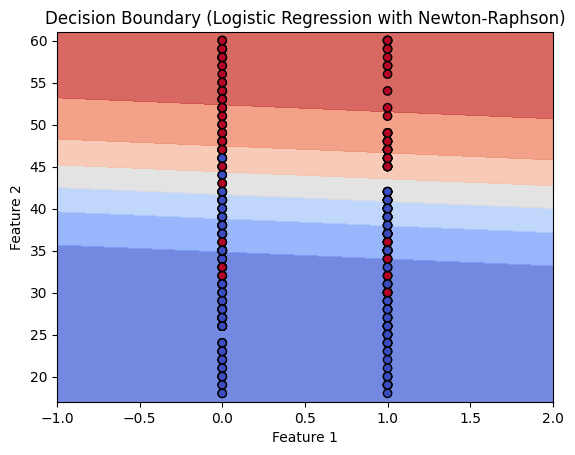

In [11]:
x_train_with_const = sm.add_constant(x_train)
model = sm.Logit(y_train, x_train_with_const)
result = model.fit(method='newton')
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X_mesh = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, x_train.iloc[:, 2].mean())]
Z = result.predict(X_mesh)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary (Logistic Regression with Newton-Raphson)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## <a id='toc1_12_'></a>[<div dir='rtl'>رسم نمودار رگرسیون لوژستیک با استفاده از سه ویژگی </div>](#toc0_)
<div dir='rtl'>
محورها:

محورهای نمودار نشان‌دهنده سه ویژگی هستند:

Feature 1: محور X

Feature 2: محور Y

Feature 3: محور Z

نقاط داده:

نقاط در نمودار با دو رنگ متفاوت نمایش داده شده‌اند که نمایانگر دو کلاس مختلف در مجموعه داده‌ها هستند.

این رنگ‌ها احتمالاً داده‌های آموزشی را بر اساس برچسب واقعی‌شان (مانند 0 و 1) تفکیک می‌کنند.

مرز تصمیم:

یک سطح صاف (plane) مرز تصمیم را در فضای سه‌بعدی نشان می‌دهد.

این مرز تصمیم توسط مدل یادگرفته شده است و نواحی فضا را به دو بخش تقسیم می‌کند:

نقاط یک طرف سطح به یک کلاس تعلق دارند.

نقاط طرف دیگر به کلاس دوم.

هدف:

این نمودار کمک می‌کند ببینیم مدل چطور کلاس‌های مختلف را در فضای سه‌بعدی از یکدیگر جدا کرده است.

اگر نقاط زیادی در سمت اشتباهی از مرز باشند، مدل ممکن است بهبود بیشتری نیاز داشته باشد.
</div>

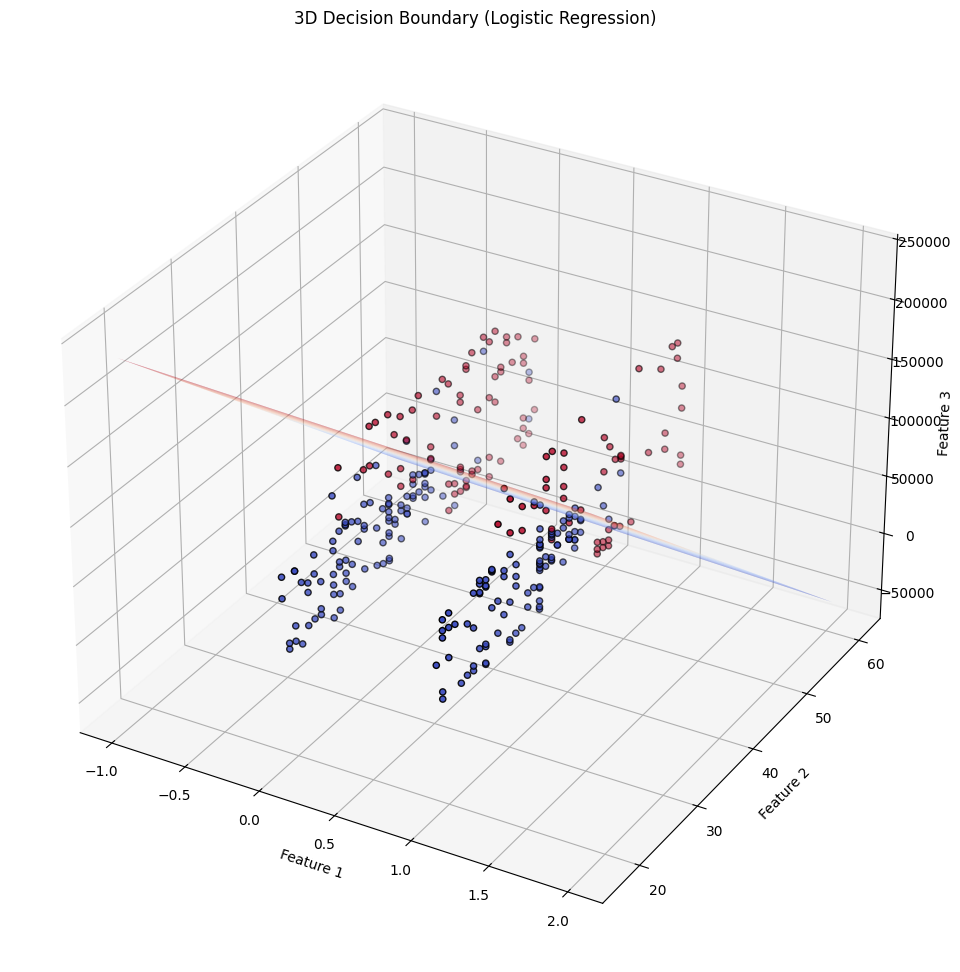

In [12]:
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
z_min, z_max = x_train.iloc[:, 2].min() - 1, x_train.iloc[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30))
zz = (-result.params[1] * xx - result.params[2] * yy - result.params[0]) / result.params[3]
fig = plt.figure(figsize=(12,18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    x_train.iloc[:, 0], x_train.iloc[:, 1], x_train.iloc[:, 2],
    c=y_train, cmap=plt.cm.coolwarm, edgecolor='k'
)
ax.plot_surface(xx, yy, zz, alpha=0.5, cmap=plt.cm.coolwarm)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.title("3D Decision Boundary (Logistic Regression)")
plt.show()

# <a id='toc2_'></a>[<div dir='rtl'>نیوتن رافسون</div>](#toc0_)

## <a id='toc2_1_'></a>[<div dir='rtl'>بارگزاری دیتا</div>](#toc0_)

In [13]:
data = load_breast_cancer()
df_2 = pd.DataFrame(data.data, columns=data.feature_names)
df_2['target'] = data.target
X, y = data.data, data.target
df_2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## <a id='toc2_2_'></a>[<div dir='rtl'>تقسیم داده ها </div>](#toc0_)
<div dir='rtl'>
مطابق با فرضیات پروژه به تقسیم بیست درصد تست و اموزش میپردازیم . 
</div>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <a id='toc2_3_'></a>[<div dir='rtl'> </div>](#toc0_)
<div dir='rtl'>
این قطعه‌کد، **تابع سیگموید** (sigmoid) را پیاده‌سازی می‌کند. تابع سیگموید به طور گسترده در مسائل یادگیری ماشین، به ویژه در رگرسیون لجستیک و شبکه‌های عصبی، استفاده می‌شود.

### <a id='toc2_3_1_'></a>[**فرمول تابع سیگموید**](#toc0_)
</div>

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
<div dir='rtl'>

### <a id='toc2_3_2_'></a>[**وظیفه تابع سیگموید**](#toc0_)
تابع سیگموید ورودی \( z \) را به بازه \([0, 1]\) نگاشت می‌کند. ویژگی‌های مهم آن عبارتند از:
- وقتی <div dir='ltr'> $$ z \to +\infty $$ </div>، سیگموید به 1 نزدیک می‌شود.
- وقتی <div dir='ltr'> $$ z \to -\infty $$ </div>، سیگموید به 0 نزدیک می‌شود.

2. **شکل S**:
   - نمودار این تابع شکلی S مانند دارد که باعث می‌شود تغییرات در بازه‌های میانی \( z \) (نزدیک به صفر) بیشتر و حساس‌تر باشد.

### <a id='toc2_3_3_'></a>[**عملکرد کد**](#toc0_)

1. **محاسبه نمایی \( -z \)**:
- با استفاده از `np.exp(-z)`، مقدار <div dir='ltr'>$$e^{-z}$$</div> محاسبه می‌شود.
2. **برگشت مقدار نهایی**:
<div dir="rtl">

- مقدار 
<div dir='ltr'>

$$
\ \frac{1}{1 + e^{-z}} \
$$

</div>
  محاسبه و به عنوان خروجی بازگردانده می‌شود.

</div>


### <a id='toc2_3_4_'></a>[**کاربردها**](#toc0_)
- **رگرسیون لجستیک**: محاسبه احتمال تعلق یک نمونه به کلاس خاص.
- **شبکه‌های عصبی**: به عنوان تابع فعال‌سازی برای نورون‌ها.
- **پیش‌بینی احتمالات**: برای مدل‌هایی که نیاز به خروجی بین 0 و 1 دارند.

</div>

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## <a id='toc2_4_'></a>[<div dir='rtl'>توضیح تابع نیوتن رافسون </div>](#toc0_)
<div dir='rtl'>

خلاصه فرآیند
مقداردهی اولیه ضرایب.

محاسبه مقادیر پیش‌بینی‌شده (
𝑝
) با استفاده از تابع سیگموید.

محاسبه گرادیان برای بهبود ضرایب.

محاسبه ماتریس هسین برای اطلاعات انحنا.

به‌روزرسانی ضرایب با استفاده از فرمول نیوتن-رافسون.

</div>

In [16]:
def newton_raphson(X, y, max_iter=100, tol=1e-6):
    n_features = X.shape[1]
    beta = np.zeros(n_features)  # مقداردهی اولیه ضرایب
    for i in range(max_iter):
        # محاسبه احتمال
        z = np.dot(X, beta)
        p = sigmoid(z)

        # گرادیان
        gradient = np.dot(X.T, (y - p))

        # ماتریس هسین
        W = np.diag(p * (1 - p))  # ماتریس وزن‌ها
        hessian = -np.dot(X.T, np.dot(W, X)) + 1e-6 * np.eye(X.shape[1])


        # به‌روزرسانی ضرایب
        beta_new = beta - np.linalg.solve(hessian, gradient)

        # بررسی همگرایی
        if np.linalg.norm(beta_new - beta, ord=2) < tol:
            print(f"Converged after {i+1} iterations.")
            break

        beta = beta_new

    return beta

## <a id='toc2_5_'></a>[<div dir='rtl'>اجرا</div>](#toc0_)

In [17]:
beta = newton_raphson(X_train, y_train)
print("Estimated coefficients:", beta)

Estimated coefficients: [2.59007973e+11 3.19376911e+11 1.71081988e+12 1.45398404e+13
 1.52018784e+09 2.13900146e+09 2.38274607e+09 1.30116362e+09
 2.86167319e+09 9.22991924e+08 8.96225393e+09 1.77923454e+10
 6.38678647e+10 1.07289265e+12 9.90944431e+07 4.70801309e+08
 6.20178819e+08 2.24384950e+08 3.02139023e+08 5.83832099e+07
 3.13000212e+11 4.34502734e+11 2.09503141e+12 2.10569689e+13
 2.14075242e+09 5.54106037e+09 6.75054331e+09 2.71945273e+09
 4.83295709e+09 1.34718705e+09]


# <a id='toc3_'></a>[<div dir = 'rtl'>مقایسه الگوریتم های رگرسیون لوژستیک ، درخت تصمیم ،<code>KNN</code>و <code>SVM</code></div>](#toc0_)

## <a id='toc3_1_'></a>[<div dir = 'rtl'>فراخوانی داده ها</div>](#toc0_)
<div dir = 'rtl'>
ما برای این منظور از دیتا ست معروف بیماران مبتلا به سرطان سینه استفاده کردیم که جدول زیر به طور کامل به متغیر ها می پردازد 
</div> 


| شماره | نام متغیر                  | توضیحات |
|------|----------------------------|---------|
| 1    | mean radius                | میانگین شعاع سلول‌ها |
| 2    | mean texture               | میانگین بافت سلول‌ها |
| 3    | mean perimeter             | میانگین محیط سلول‌ها |
| 4    | mean area                  | میانگین مساحت سلول‌ها |
| 5    | mean smoothness            | میانگین صافی سلول‌ها |
| 6    | mean compactness           | میانگین فشردگی سلول‌ها |
| 7    | mean concavity             | میانگین میزان فرو رفتگی سلول‌ها |
| 8    | mean concave points        | میانگین تعداد نقاط فرورفته در سطح سلول |
| 9    | mean symmetry              | میانگین تقارن سلول‌ها |
| 10   | mean fractal dimension     | میانگین بعد فراکتالی سلول‌ها |
| 11   | radius error               | خطای اندازه‌گیری شعاع |
| 12   | texture error              | خطای اندازه‌گیری بافت |
| 13   | perimeter error            | خطای اندازه‌گیری محیط |
| 14   | area error                 | خطای اندازه‌گیری مساحت |
| 15   | smoothness error           | خطای اندازه‌گیری صافی |
| 16   | compactness error          | خطای اندازه‌گیری فشردگی |
| 17   | concavity error            | خطای اندازه‌گیری میزان فرورفتگی |
| 18   | concave points error       | خطای اندازه‌گیری نقاط فرورفته |
| 19   | symmetry error             | خطای اندازه‌گیری تقارن |
| 20   | fractal dimension error    | خطای اندازه‌گیری بعد فراکتالی |
| 21   | worst radius               | بیشترین مقدار اندازه‌گیری شده برای شعاع |
| 22   | worst texture              | بیشترین مقدار اندازه‌گیری شده برای بافت |
| 23   | worst perimeter            | بیشترین مقدار اندازه‌گیری شده برای محیط |
| 24   | worst area                 | بیشترین مقدار اندازه‌گیری شده برای مساحت |
| 25   | worst smoothness           | بیشترین مقدار اندازه‌گیری شده برای صافی |
| 26   | worst compactness          | بیشترین مقدار اندازه‌گیری شده برای فشردگی |
| 27   | worst concavity            | بیشترین مقدار اندازه‌گیری شده برای فرورفتگی |
| 28   | worst concave points       | بیشترین مقدار نقاط فرورفته |
| 29   | worst symmetry             | بیشترین مقدار تقارن |
| 30   | worst fractal dimension    | بیشترین مقدار بعد فراکتالی |
| 31   | target                     | برچسب کلاس (0: بدخیم، 1: خوش‌خیم) |


In [18]:
data_1 = load_breast_cancer()
X,y = data_1.data , data_1.target
data_1 = pd.DataFrame(X,columns=data_1.feature_names)
data_1['target'] = y
data_1 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## <a id='toc3_2_'></a>[<div dir = 'rtl'>تقسیم داده ها به دو بخش آموزش و تست </div>](#toc0_)

In [19]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

## <a id='toc3_3_'></a>[<div dir ='rtl'>استاندارد کردن متغیر های ورودی</div>](#toc0_)

In [20]:
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)

## <a id='toc3_4_'></a>[<div dir = 'rtl'> پیدا کردن بهترین مقدار <code>K</code> برای الگوریتم <code>KNN</code></div>](#toc0_)

In [21]:
param_grid = {'n_neighbors':list(range(1,21,2))}
Grid_search = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 5 , scoring = 'accuracy',n_jobs=-1)
Grid_search.fit(X_train_1,y_train_1)
best_k = Grid_search.best_params_['n_neighbors']
print(best_k)

5


## <a id='toc3_5_'></a>[<div dir ='rtl'>تعریف مدل های مورد بررسی</div>](#toc0_)

In [22]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "SVM" : SVC(),
    "KNN(k=1)" : KNeighborsClassifier(n_neighbors=1),
    "KNN(k=best)" :KNeighborsClassifier(n_neighbors=best_k)
    }

## <a id='toc3_6_'></a>[<div dir = 'rtl'>برازش مدل های مورد بررسی و مقایسه دقت آنان و رسم منحنی <code>ROC</code></div>](#toc0_)

Logistic Regression Accuracy: 0.9737

 confusion_matrix :
[[41  2]
 [ 1 70]]

گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Decision Tree Accuracy: 0.9298

 confusion_matrix :
[[39  4]
 [ 4 67]]

گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

SVM Accuracy: 0.9825

 confusion_matrix :
[[41  2]
 [ 0 71]]

گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       1.00     

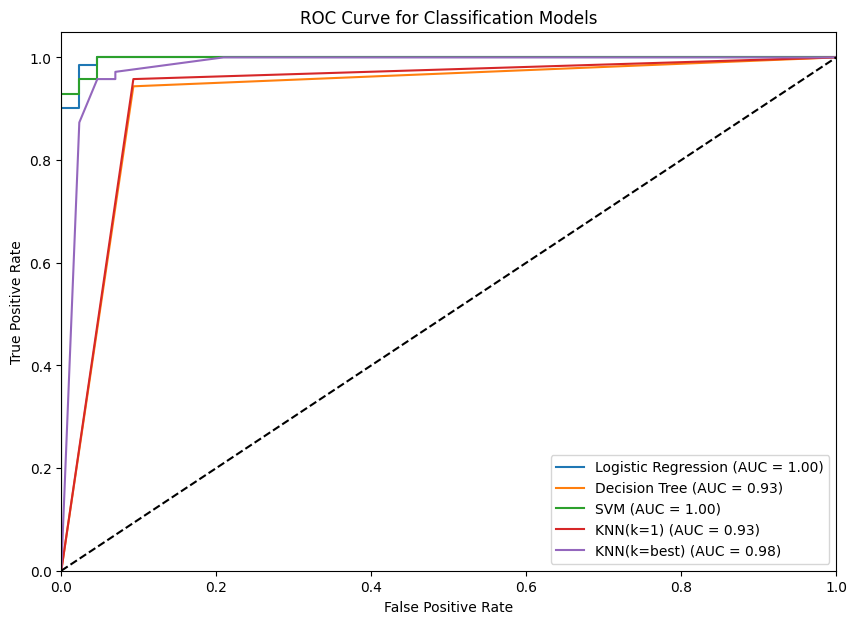

In [23]:
plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train_1, y_train_1)
    y_pred_1 = model.predict(X_test_1)
    y_prob_1 = model.predict_proba(X_test_1)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_1)
    fpr, tpr, _ = roc_curve(y_test_1, y_prob_1)
    roc_auc = auc(fpr, tpr)
    class_report = classification_report(y_test_1, y_pred_1)
    acc = accuracy_score(y_test_1, y_pred_1)
    print(f"{name} Accuracy: {acc:.4f}")
    print("\n confusion_matrix :")
    print(confusion_matrix(y_test_1, y_pred_1))
    print("\nگزارش طبقه‌بندی:")
    print(class_report)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')   
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Classification Models")
plt.legend(loc="lower right")
plt.show()

<div dir = 'rtl'>
در این تصویر، نمودار ROC (منحنی مشخصه عملیاتی گیرنده) به نمایش گذاشته شده که عملکرد چندین مدل طبقه‌بندی را از نظر توانایی آن‌ها در جداسازی درست نمونه‌های مثبت و منفی نشان می‌دهد. محور افقی نشان‌دهنده نرخ مثبت کاذب (False Positive Rate یا FPR) و محور عمودی نمایانگر نرخ مثبت واقعی (True Positive Rate یا TPR) است؛ به عبارتی دیگر، هر نقطه روی منحنی نشان‌دهنده عملکرد مدل در یک آستانه تصمیم‌گیری خاص است.

**توضیح مدل‌ها و عملکرد آن‌ها:**  
1. **Logistic Regression:**  
   - دارای AUC (مساحت زیر منحنی) برابر با ۱.۰۰ است. این یعنی مدل قادر به تفکیک کامل بین کلاس‌های مثبت و منفی است. AUC برابر با ۱ نشان‌دهنده عملکرد بی‌نقص مدل است.  
2. **SVM (Support Vector Machine):**  
   - مشابه Logistic Regression، مقدار AUC این مدل نیز ۱.۰۰ می‌باشد که نشان می‌دهد از نظر تفکیک کلاس‌ها عملکرد بدون خطا دارد.  
3. **Decision Tree:**  
   - این مدل با AUC برابر با ۰.۹۳ عملکرد قابل قبولی دارد، اما نسبت به دو مدل فوق از نظر دقت تفکیک افراد کمی پایین‌تر عمل کرده است.  
4. **KNN با k=1:**  
   - نیز دارای AUC برابر با ۰.۹۳ است. به این معنا که در حالت k=۱، الگوریتم نزدیک به درخت تصمیم عمل می‌کند و توانایی تفکیک کلاس‌ها به همان اندازه کامل نیست.  
5. **KNN با بهترین مقدار k (k=best):**  
   - با بهینه‌سازی پارامتر k، این مدل به AUC برابر با ۰.۹۸ دست یافته که نشان‌دهنده بهبود قابل توجه عملکرد نسبت به حالت k=۱ و نزدیک‌تر شدن به عملکرد مدل‌های Logistic Regression و SVM است.

**تفسیر کلی نمودار:**  
- **AUC (مساحت زیر منحنی):** معیاری است برای سنجش توانایی یک مدل در تفکیک بین کلاس‌های مثبت و منفی. هرچه مقدار AUC به ۱ نزدیک‌تر باشد، مدل بهتر عمل کرده و تفکیک‌کننده‌ی بهتری محسوب می‌شود.
- **تلفیق بین سطح عملیاتی‌های مختلف:** با تغییر آستانه تصمیم‌گیری، مقدار TPR و FPR تغییر می‌کند؛ هر منحنی ROC نمایانگر تغییر این مقادیر برای آستانه‌های مختلف است. به این ترتیب، مقایسه منحنی‌های مختلف در یک نمودار، امکان بررسی و انتخاب بهترین مدل بر اساس نیاز به تعادل بین حساسیت (Sensitivity) و ویژگی (Specificity) را فراهم می‌کند.

**نتیجه‌گیری و نکات تکمیلی:**  
- مدل‌های Logistic Regression و SVM که هر دو AUC معادل ۱ دارند، از نظر تشخیصی عملکرد بسیار بالایی دارند.  
- مدل‌های Decision Tree و KNN (آغاز با k=۱) علی‌رغم عملکرد خوب، نمی‌توانند بالا بودن توانایی تفکیک مانند دو مدل اول را تضمین کنند.  
- بهینه‌سازی مقدار k در الگوریتم KNN (k=best) نشان می‌دهد که با تنظیم دقیق پارامترها، می‌توان عملکرد مدل را تا حد زیادی بهبود بخشید.

این تحلیل نشان‌دهنده اهمیت انتخاب صحیح مدل و تنظیم دقیق پارامترهای آن‌هاست، چرا که حتی تفاوت کوچک در مقدار AUC می‌تواند در کاربردهای حساس و بحرانی تفاوت‌های زیادی ایجاد کند. همچنین، باید در نظر داشت که عملکرد ایده‌آل مدل‌ها در محیط‌های تست همیشه قابل تعمیم به محیط‌های عملی نیست و ارزیابی‌های میدانی و بررسی‌های دقیق‌تر از اهمیت ویژه‌ای برخوردارند.
</div>

## <a id='toc3_7_'></a>[<div dir = 'rtl'>رسم درخت تصمیم </div>](#toc0_)

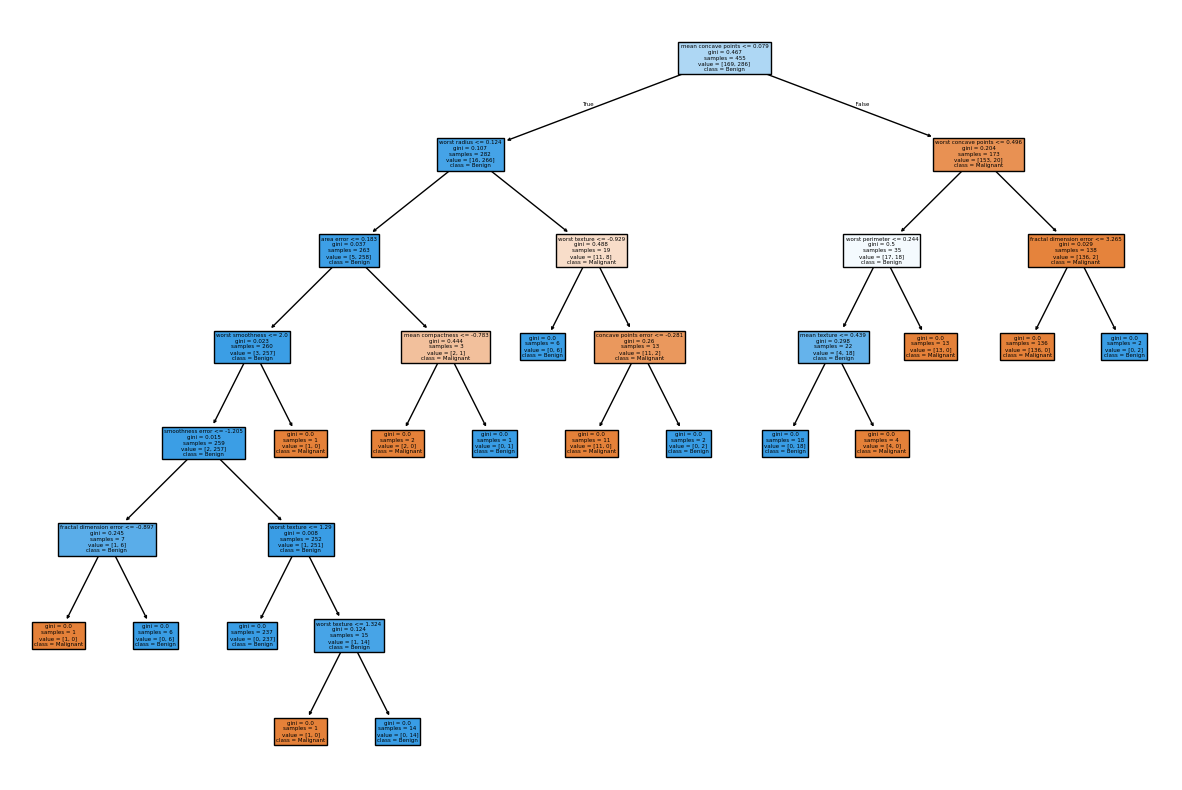

In [24]:
tree_model = models["Decision Tree"]
tree_model.fit(X_train_1, y_train_1)
plt.figure(figsize=(15, 10))  
plot_tree(tree_model, feature_names=data_1.columns[:-1], class_names=["Malignant", "Benign"], filled=True)
plt.show()

# <a id='toc4_'></a>[<div dir ='rtl'>معیار های سنجش مدل </div >](#toc0_)

<div dir='rtl'style="text-align: right;">

برای انتخاب مدل‌های آماری، معیارهای مختلفی وجود دارند که هر کدام زوایای متفاوتی از عملکرد مدل را ارزیابی می‌کنند. در زیر به مقایسه‌ی AIC، BIC و LL می‌پردازیم:

---

### <a id='toc4_1_1_'></a>[AIC (Akaike Information Criterion)](#toc0_)

- **تعریف:**  
  AIC معیاری برای انتخاب مدل است که براساس لگاریتم تابع درستنمایی (Likelihood) ساخته شده و با اضافه کردن یک جریمه برای تعداد پارامترهای مدل، سعی در جلوگیری از بیش‌برازش دارد.  
- **فرمول:**  
  
  <div dir='ltr'>
  
  $\
  AIC = -2 \log(L) + 2k
  \
  $

  </div>

  که در آن \( L \) تابع درستنمایی و \( k \) تعداد پارامترهاست.
- **کاربرد:**  
  مدل‌هایی با مقدار پایین‌تر AIC بهتر در نظر گرفته می‌شوند؛ به عبارت دیگر، مدلی که هزینه‌ی محاسباتی (از لحاظ پیچیدگی) کمتری داشته باشد و همزمان کیفیت برازش بهتری ارائه دهد انتخاب می‌شود.

---

### <a id='toc4_1_2_'></a>[BIC (Bayesian Information Criterion)](#toc0_)

- **تعریف:**  
  مشابه  BIC,AIC نیز برای انتخاب مدل به کار می‌رود، اما جریمه‌ای سنگین‌تر برای پیچیدگی مدل ارائه می‌دهد. این موضوع به ویژه در نمونه‌های بزرگ‌تر مهم است.
- **فرمول:**  
  
    <div dir='ltr'>

  $\
  BIC = -2 \log(L) + k \log(n)
  \
  $
    </div>

  که در آن $( n )$ اندازه نمونه است. به وضوح متوجه هستیم که با افزایش \( n \) جریمه برای پارامترهای اضافی بیشتر می‌شود.
- **کاربرد:**  
  مدلی که مقدار BIC کمتری داشته باشد ترجیح داده می‌شود. به دلیل جریمه‌ی بیشتر، BIC معمولاً مدل‌های ساده‌تری را نسبت به AIC انتخاب می‌کند؛ به ویژه زمانی که $( n )$ بزرگ باشد.

---
**Log-Likelihood (LL)** یا **لگاریتم درست‌نمایی** مفهومی اساسی در آمار و یادگیری ماشین است که بیانگر میزان برازش مدل به داده‌هاست. این معیار بر اساس تابع درست‌نمایی (Likelihood Function) عمل می‌کند. در ادامه توضیح کامل آن آورده شده است:

---

### <a id='toc4_1_3_'></a>[**درست‌نمایی چیست؟**](#toc0_)
**درست‌نمایی (Likelihood)** نشان‌دهنده احتمال مشاهده داده‌های موجود (داده‌های واقعی) تحت فرض مدل پارامتری خاصی است. به عبارت دیگر، درست‌نمایی اندازه می‌گیرد که داده‌ها چقدر احتمال دارند از توزیعی با پارامترهای مشخص سرچشمه گرفته باشند.

-  فرمول تابع درست‌نمایی به شکل زیر است:
 

    <div dir = 'ltr'>
    
    $\
    L(\theta) = P(X | \theta)
    \
    $   

    </div>



که در آن:
- $( X )$: داده‌های مشاهده‌شده است.
- $ ( \theta ) $: پارامترهای مدل است.

---

### <a id='toc4_1_4_'></a>[**چرا Log-Likelihood (LL) استفاده می‌شود؟**](#toc0_)
محاسبه درست‌نمایی برای مجموعه داده‌های بزرگ مشکل است؛ زیرا ضرب مقادیر احتمال کوچک منجر به عددی بسیار کوچک و در نهایت خطای محاسباتی می‌شود. برای حل این مشکل، از لگاریتم درست‌نمایی استفاده می‌کنیم:


$\
LL(\theta) = log(L(\theta)) = log(P(X | \theta))
\
$

مزایای استفاده از لگاریتم درست‌نمایی:
- کاهش اثر عددی مقادیر کوچک (استحکام محاسباتی).
- ساده‌تر کردن مشتق‌گیری و بهینه‌سازی.

---

### <a id='toc4_1_5_'></a>[**محاسبه Log-Likelihood (LL)**](#toc0_)
برای مدل‌های مختلف، فرمول LL بسته به توزیع داده‌ها متفاوت است. مثال‌هایی از LL برای توزیع‌های رایج:
- **توزیع نرمال:** 
    

  فرض کنیم $ ( X )\ $ از توزیع نرمال با میانگین $ ( \mu )\ $ و واریانس <div dir = 'ltr'> 
  $( \sigma^2 )\ $ </div>  پیروی کند:
  <div dir ='ltr'>  
  
  $\
  LL = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2
  \
  $
  </div>
- **توزیع برنولی:**  
  اگر داده‌ها از توزیع برنولی با پارامتر \( p \) باشند:
  <div dir = 'ltr'>  
     
  $\
  LL = \sum_{i=1}^{n} [y_i \log(p) + (1 - y_i)\log(1 - p)]
  \
  $

  </div>  
---

### <a id='toc4_1_6_'></a>[**نقش Log-Likelihood در انتخاب مدل**](#toc0_)
- **برازش بهتر:** مقدار LL بیشتر (کمتر منفی) نشان‌دهنده برازش بهتر مدل است.
- **معیارهای AIC و BIC:** LL پایه‌ای برای محاسبه این معیارهاست:
  <div dir='ltr'> 

  - $( AIC = -2 \cdot LL + 2k )$   
  - $( BIC = -2 \cdot LL + k \cdot \log(n) )$

  </div>
  این معیارها از LL استفاده می‌کنند و در عین حال جریمه‌ای برای پیچیدگی مدل اعمال می‌کنند.

---

### <a id='toc4_1_7_'></a>[ **جمع‌بندی**](#toc0_)
Log-Likelihood یک معیار کلیدی است که میزان برازش مدل به داده‌ها را بیان می‌کند. این معیار در بهینه‌سازی مدل‌ها (مانند رگرسیون، یادگیری ماشین و ...) و مقایسه مدل‌ها با معیارهایی مانند AIC و BIC نقش بسیار مهمی دارد. با توجه به توزیع داده‌ها و نوع مسئله، فرمول آن تغییر می‌کند.

</div>

In [25]:
def calculate_log_likelihood(data, mean, std_dev):
    """
    محاسبه Log-Likelihood برای داده‌ها با فرض توزیع نرمال
    data: آرایه از NumPy
    mean: میانگین مدل (float)
    std_dev: انحراف معیار مدل (float)
    """
    data = np.array(data)
    n = len(data)
    log_likelihood = -0.5 * n * np.log(2 * np.pi) - n * np.log(std_dev) - np.sum((data - mean)**2) / (2 * std_dev**2)
    return log_likelihood

# مثال:
data = [2.3, 2.7, 2.8, 3.1, 3.0]  
mean = 2.9                       
std_dev = 0.2                    

log_likelihood = calculate_log_likelihood(data, mean, std_dev)
print("Log-Likelihood:", log_likelihood)

Log-Likelihood: -2.297503103852862


In [26]:
def calculate_aic_bic(ll, k, n):
    """
    ll: Log-Likelihood (عدد مثبت)
    k: تعداد پارامترهای مدل
    n: تعداد نمونه‌ها
    """
    aic = -2 * ll + 2 * k
    bic = -2 * ll + k * np.log(n)
    return aic, bic
log_likelihood = -120.5  
num_parameters = 5       
num_samples = 100        
aic, bic = calculate_aic_bic(log_likelihood, num_parameters, num_samples)
print("AIC:", aic)
print("BIC:", bic)

AIC: 251.0
BIC: 264.0258509299405


<div dir = 'rtl'>

# <a id='toc5_'></a>[مقدمه هوش مصنوعی](#toc0_)
شبکههای عصبی مصنوعی (ANNs) یکی از پایههای اصلی **هوش مصنوعی** و **یادگیری عمیق** هستند. این شبکهها با تقلید از ساختار مغز انسان، توانایی یادگیری الگوهای پیچیده از دادهها را دارند.  
- **کاربردها**:  
  - تشخیص تصویر (مثلاً تشخیص تومور در عکسهای پزشکی).  
  - پردازش زبان طبیعی (مثل ترجمه ماشینی یا چتباتها).  
  - سیستمهای پیشنهادگر (مثل پیشنهاد فیلم در Netflix).  
- **چرا انقلابی هستند؟**  
  - پیش از این، برای هر مسئله، الگوریتمهای دستساز نیاز بود. اما شبکههای عصبی **خودکار** الگوها را یاد میگیرند!  

---

### <a id='toc5_1_1_'></a>[ نورون مصنوعی و محاسبات](#toc0_)
#### <a id='toc5_1_1_1_'></a>[ساختار یک نورون:](#toc0_)
هر نورون مصنوعی سه بخش اصلی دارد:  
1. **ورودیها (x₁, x₂, ..., xₙ)**: دادههای خام (مثلاً مقادیر پیکسلها).  
2. **وزنها (w₁, w₂, ..., wₙ)**: اهمیت هر ورودی (مثلاً وزن پیکسلهای لبههای تصویر برای تشخیص عدد بیشتر است).  
3. **بایاس (b)**: یک عدد ثابت که به جمع وزنی اضافه میشود تا مدل انعطافپذیرتر شود.  


#### <a id='toc5_1_1_2_'></a>[فرمول ریاضی نورون:](#toc0_)

<div dir= 'ltr'>

$\\( z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b )$

</div>

سپس خروجی نورون با اعمال **تابع فعالسازی (σ)** محاسبه میشود:  

<div dir= 'ltr'>


$\\( a = σ(z) )$ 

</div>


#### <a id='toc5_1_1_3_'></a>[مثال عددی:](#toc0_)
فرض کنید ورودیها $\\([1, 0.5]= x   )$، وزنها $\\( [0.7, 0.2-]= w   )$ و بایاس $\\(  0.1 = b  )$ باشد:  

<div dir= 'ltr'>

$\\( z = (1×0.7) + (0.5×-0.2) + 0.1 = 0.7 - 0.1 + 0.1 = 0.7 )  $

</div>

اگر تابع فعالسازی ReLU باشد:  

<div dir= 'ltr'>

$\\( a = ReLU(0.7) = 0.7 )$  

</div>


### <a id='toc5_1_2_'></a>[ لایهها و معماری شبکه](#toc0_)
#### <a id='toc5_1_2_1_'></a>[**الف) لایه ورودی (Input Layer):**](#toc0_)
- هر نورون در این لایه یک ویژگی از داده را دریافت میکند.  
- مثال: در تصاویر ۲۸x28 پیکسل، لایه ورودی ۷۸۴ نورون دارد.  

#### <a id='toc5_1_2_2_'></a>[**ب) لایههای پنهان (Hidden Layers):**](#toc0_)
- هر لایه پنهان از دهها تا هزاران نورون تشکیل شده است.  
- **عمق شبکه**: هرچه لایههای پنهان بیشتر باشد، شبکه توانایی یادگیری الگوهای پیچیدهتر را دارد (مثلاً شبکههای با ۱۰۰ لایه!).  

#### <a id='toc5_1_2_3_'></a>[**ج) لایه خروجی (Output Layer):**](#toc0_)
- بسته به نوع مسئله، ساختار متفاوتی دارد:  
  - **طبقهبندی دودویی (مثلاً گربه/سگ)**: ۱ نورون با تابع Sigmoid.  
  - **طبقهبندی چندکلاسه (مثلاً تشخیص ۱۰ عدد)**: ۱۰ نورون با تابع Softmax.  
  - **پیشبینی عددی (مثلاً قیمت سهام)**: ۱ نورون بدون تابع فعالسازی.  

---

### <a id='toc5_1_3_'></a>[**فرآیند یادگیری**](#toc0_)
#### <a id='toc5_1_3_1_'></a>[**الف) پیشبینی (Forward Pass):**](#toc0_)
- داده از لایه ورودی به خروجی عبور میکند.  
- مثال:  
  - تصویر عدد «۵» وارد شبکه میشود.  
  - شبکه ابتدا میگوید «۳» است (به دلیل وزنهای اولیه تصادفی).  

#### <a id='toc5_1_3_2_'></a>[**ب) محاسبه خطا (Loss Function):**](#toc0_)
- **تابع خطا** تفاوت بین پیشبینی و واقعیت را اندازه میگیرد.  
- توابع رایج:  
  - **MSE (میانگین مربعات خطا)**: برای مسائل رگرسیون.  
  - **Cross-Entropy**: برای طبقهبندی.  
- مثال: اگر جواب واقعی «۵» باشد و شبکه احتمال «۵» را ۰.۱ پیشبینی کند، خطا زیاد است!  

#### <a id='toc5_1_3_3_'></a>[**ج) پسانتشار خطا (Backpropagation):**](#toc0_)
- **هدف**: محاسبه گرادیان (مشتق خطا نسبت به هر وزن).  
- **چگونه؟** با استفاده از **قاعده زنجیرهای (Chain Rule)** در حسابان.  
- مثال:  
  - اگر وزن <div dir='ltr'>( w₁ )</div>باعث خطای بیشتری شود، مشتق خطا نسبت به<div dir = 'ltr'>( w₁ )</div> بزرگتر است.  

#### <a id='toc5_1_3_4_'></a>[**د) بهروزرسانی وزنها (Gradient Descent):**](#toc0_)
- فرمول بهروزرسانی وزنها: 

  <div dir='ltr'>

  $$\\( w_{new} = w_{old} - η \cdot \frac{\partial Loss}{\partial w} )$$

   </div>

  - **η (نرخ یادگیری)**: سرعت یادگیری شبکه را کنترل میکند (مثلاً ۰.۰۰۱).  
- مثال:  
  - اگر $\\( 0.5 = \frac{\partial Loss}{\partial w})$ و $\\( 0.1 = η )$ باشد:  
  
  <div dir='ltr'>

  $\\( w_{new} = w_{old} - 0.1 \times 0.5 = w_{old} - 0.05 )  $
  </div>
#### <a id='toc5_1_3_5_'></a>[**ه) تکرار (Epochs):**](#toc0_)
- کل دادههای آموزشی چندین بار (مثلاً ۱۰۰ بار) از شبکه عبور میکنند تا خطا به حداقل برسد.  

---

### <a id='toc5_1_4_'></a>[**توابع فعالسازی**](#toc0_)
#### <a id='toc5_1_4_1_'></a>[**الف) تابع Sigmoid:**](#toc0_)
- فرمول: <div dir = 'ltr'>$$\\( σ(z) = \frac{1}{1 + e^{-z}} )$$</div> 
- خروجی بین ۰ و ۱ (مناسب برای احتمال).  
- مشکل: گرادیان در مقادیر بالا یا پایین صفر میشود (**Vanishing Gradient**).  

#### <a id='toc5_1_4_2_'></a>[**ب) تابع ReLU (Rectified Linear Unit):**](#toc0_)
- فرمول: <div dir = 'ltr'>$$\\( ReLU(z) = \max(0, z) ) $$</div>  
- مزایا:  
  - محاسبات سریع.  
  - حل مشکل Vanishing Gradient.  
- معایب: نورونهای «مرده» (اگر خروجی همیشه صفر شود).  

#### <a id='toc5_1_4_3_'></a>[**ج) تابع Softmax:**](#toc0_)
- فرمول: <div dir = 'ltr'>$$\\( Softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}} )$$</div>   
- تمام خروجیها را به احتمال تبدیل میکند (مجموع احتمالات برابر ۱ است).  

---

### <a id='toc5_1_5_'></a>[**انواع شبکههای عصبی**](#toc0_)
#### <a id='toc5_1_5_1_'></a>[**الف) MLP (پرسپترون چندلایه):**](#toc0_)
- سادهترین معماری برای دادههای غیرتصویری.  
- مثال: پیشبینی قیمت خانه بر اساس متراژ، تعداد اتاقها و ...  

#### <a id='toc5_1_5_2_'></a>[**ب) CNN (شبکه کانولوشنی):**](#toc0_)
- **لایههای کانولوشن**: با فیلترهایی مانند تشخیص لبهها، ویژگیهای تصویر را استخراج میکنند.  
- **لایههای Pooling**: ابعاد داده را کاهش میدهند (مثلاً Max Pooling).  
- مثال: تشخیص تومور در تصاویر MRI.  

#### <a id='toc5_1_5_3_'></a>[**ج) RNN (شبکه بازگشتی):**](#toc0_)
- برای دادههای دنبالهای (متن، صوت، سری زمانی).  
- **مشکل**: فراموشی اطلاعات در دنبالههای بلند (**Vanishing Gradient**).  
- **راهحل**: استفاده از **LSTM** یا **GRU** (نورونهای با حافظه بلندمدت).  

#### <a id='toc5_1_5_4_'></a>[**د) Transformers:**](#toc0_)
- جایگزین RNNها برای پردازش زبان طبیعی.  
- از **مکانیزم توجه (Attention)** استفاده میکنند تا به کلمات مهم وزن بیشتری دهد.  
- مثال: مدلهای GPT و BERT.  

---



---

### <a id='toc5_1_6_'></a>[**چالشها و محدودیتها**](#toc0_)
- **نیاز به دادههای زیاد**: شبکههای عمیق به هزاران مثال نیاز دارند.  
- **مصرف محاسباتی بالا**: آموزش مدلهای بزرگ نیاز به GPU دارد.  
- **خطر بیشبرازش (Overfitting)**: زمانی که شبکه فقط دادههای آموزشی را حفظ میکند!  
  - **راهحل**: استفاده از Dropout، Regularization یا افزایش دادهها.  

---

### <a id='toc5_1_7_'></a>[**جمع بندی و پیشنهادات**](#toc0_)
- **جمعبندی**:  
  - شبکههای عصبی با تقلید از مغز انسان، الگوها را از داده ها یاد میگیرند.  
  - موفقیت آنها به دلیل معماری انعطافپذیر و توانایی در یادگیری غیرخطی است.  
- **پیشنهادات**:  
  - شروع با پروژههای ساده مانند MNIST.  
  - یادگیری کتابخانههایی مثل TensorFlow یا PyTorch.  
  - مطالعه مقالات کلیدی مانند **«Attention Is All You Need»** برای درک ترنسفورمرها.  

---

</div>


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'),   
    Dense(10, activation='softmax') 
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'] 
)

history = model.fit(
    x_train, y_train,
    epochs=10, 
    validation_split=0.2  
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nدقت مدل روی داده تست: {test_acc * 100:.2f}%')

sample_index = np.random.randint(0, x_test.shape[0]) 
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]

prediction = model.predict(sample_image.reshape(1, 28, 28)) 
predicted_label = np.argmax(prediction) 

print(f'\nپیشبینی مدل: {predicted_label}')
print(f'برچسب واقعی: {sample_label}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8609 - loss: 0.4947 - val_accuracy: 0.9573 - val_loss: 0.1492
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9606 - loss: 0.1368 - val_accuracy: 0.9661 - val_loss: 0.1144
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9742 - loss: 0.0880 - val_accuracy: 0.9713 - val_loss: 0.0986
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9804 - loss: 0.0652 - val_accuracy: 0.9688 - val_loss: 0.1056
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0528 - val_accuracy: 0.9710 - val_loss: 0.0956
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9884 - loss: 0.0393 - val_accuracy: 0.9743 - val_loss: 0.0917
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9913 - loss: 0.0305 - val_accuracy: 0.9767 - val_loss: 0.0827
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9929 - loss: 0.0246 - 

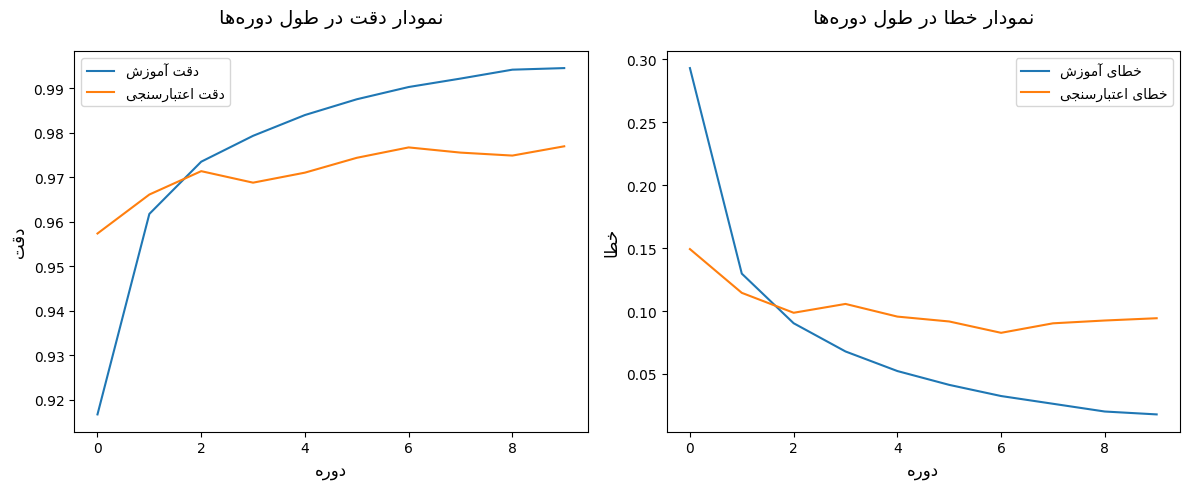

In [29]:
import arabic_reshaper
from bidi.algorithm import get_display
plt.rcParams['axes.unicode_minus'] = False  

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

plt.figure(figsize=(12, 5))

# نمودار دقت
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label=persian_text('دقت آموزش'))
plt.plot(history.history['val_accuracy'], label=persian_text('دقت اعتبارسنجی'))
plt.xlabel(persian_text('دوره'), fontsize=12)
plt.ylabel(persian_text('دقت'), fontsize=12)
plt.title(persian_text('نمودار دقت در طول دوره‌ها'), fontsize=14, pad=20)
plt.legend(loc='upper left')  

# نمودار خطا
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label=persian_text('خطای آموزش'))
plt.plot(history.history['val_loss'], label=persian_text('خطای اعتبارسنجی'))
plt.xlabel(persian_text('دوره'), fontsize=12)
plt.ylabel(persian_text('خطا'), fontsize=12)
plt.title(persian_text('نمودار خطا در طول دوره‌ها'), fontsize=14, pad=20)
plt.legend(loc='upper right')  
plt.tight_layout()
plt.show();

# <a id='toc6_'></a>[<div dir = 'rtl'>خوشه بندی </div>](#toc0_)
<div dir ='rtl'>

**مقدمهٔ  برای الگوریتمهای خوشه بندی:**  
خوشه بندی (Clustering) به عنوان یکی از پایه های اصلی **یادگیری بدون ناظر** (Unsupervised Learning) در علم داده و هوش مصنوعی شناخته میشود. هدف این الگوریتم ها، کشف ساختارهای ذاتی در داده هاست، بدون آنکه از پیش برچسبی برای نمونه ها وجود داشته باشد. خوشه بندی با گروه بندی داده ها بر اساس **شباهتهای آماری** و **معیارهای فاصله** (مانند فاصله اقلیدسی، منهتن، یا کسینوسی)، تلاش می کند تا اشیاء را به گونه ای سازماندهی کند که اعضای هر خوشه تا حد امکان به یکدیگر شبیه و به اعضای خوشه های دیگر ناهمسان باشند.  

این الگوریتمها به دو دستهٔ کلی **سلسله مراتبی** (Hierarchical) و **غیرسلسله مراتبی** (Partitional) تقسیم میشوند. روشهای سلسله مراتبی مانند **Hierarchical Clustering**، ساختاری درختی از خوشه ها ایجاد میکنند که امکان تحلیل دادهها در سطوح مختلف تجمع را فراهم میسازد. در مقابل، الگوریتمهای غیرسلسله مراتبی مانند **K-Means** یا **DBSCAN**، داده ها را به تعداد مشخص یا پویایی از خوشه ها تقسیم می کنند. برای مثال، K-Means با بهینه سازی واریانس درونخوشهای، مراکز خوشه ها (Centroids) را تنظیم میکند، در حالی که DBSCAN با شناسایی نواحی با تراکم بالا (Density-Based)، خوشه ها و نویز را تشخیص می دهد.  

کاربردهای خوشه بندی در علوم مختلف گسترده است:  
- در **زیست شناسی محاسباتی**، برای دسته بندی ژنها با الگوهای بیان مشابه.  
- در **بازاریابی**، برای تقسیم بندی مشتریان بر اساس رفتار خرید.  
- در **پردازش تصویر**، برای بخش بندی تصاویر به نواحی همگن.  
- در **کاوش متن**، برای گروه بندی اسناد با موضوعات مشترک.  

با این حال، چالش های متعددی در خوشه بندی وجود دارد، از جمله **انتخاب معیار فاصله مناسب**، **تعیین تعداد بهینه خوشه ها** (مانند روش Elbow یا شاخص Silhouette)، و **مقابله با ابعاد بالا** (Curse of Dimensionality) که میتواند بر عملکرد الگوریتمها تأثیر منفی بگذارد. همچنین، الگوریتم هایی مانند **Gaussian Mixture Models (GMM)** با استفاده از مفاهیم آماری، توزیع داده ها را مدلسازی می کنند، در حالی که روشهای مبتنی بر **یادگیری عمیق** مانند **خودرمزگذارها** (Autoencoders)، امکان خوشه بندی در فضای نهفته (Latent Space) را فراهم میآورند.  

در نهایت، خوشهبندی نه تنها یک ابزار تحلیل داده، بلکه پنجرهای به سوی **کشف دانش ناشناخته** است. این الگوریتمها با تبدیل داده های خام به ساختارهای معنادار، پایه های برای تصمیم گیری های مبتنی بر شواهد در پژوهشهای علمی و صنعتی فراهم می کنند.

</div>

## <a id='toc6_1_'></a>[<div dir ='rtl'> بارگیری داده ها </div>](#toc0_)
<div dir ='rtl'>
</div>

<img src="mnist-3.0.1.png" alt="Alt text" width="600" height="500" style="display: block; margin: auto;" />


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3340 - val_loss: 0.1685
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1598 - val_loss: 0.1371
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1351 - val_loss: 0.1243
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1237 - val_loss: 0.1165
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1168 - val_loss: 0.1121
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1117 - val_loss: 0.1077
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1083 - val_loss: 0.1050
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1057 - val_loss: 0.1034
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1037 - val_loss: 0.1012
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1020 - val_loss: 0.0998
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1008 - val_loss: 0.0987
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

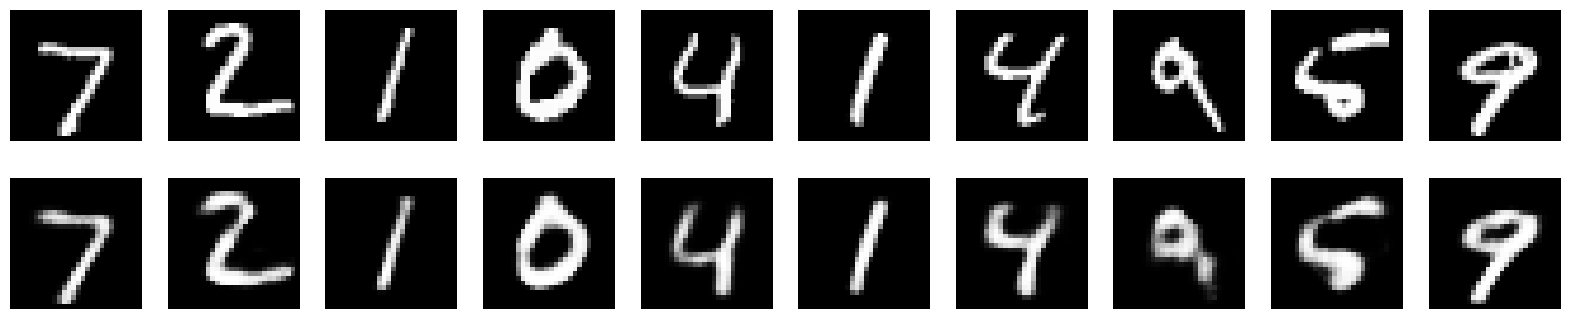

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# بارگذاری داده‌های MNIST
(X_train, _), (X_test, _) = mnist.load_data()

# نرمال‌سازی و reshape داده‌ها
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), -1))  # (60000, 784)
X_test = X_test.reshape((len(X_test), -1))     # (10000, 784)

# تعریف Autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# آموزش مدل
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# استخراج ویژگی‌های فشرده‌شده
X_encoded = encoder.predict(X_test)

# نمایش چند تصویر اصلی و بازسازی‌شده
decoded_imgs = autoencoder.predict(X_test)

n = 10  # چند تصویر برای نمایش
plt.figure(figsize=(20, 4))
for i in range(n):
    # تصویر اصلی
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # تصویر بازسازی‌شده
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


## <a id='toc6_2_'></a>[<div dir ='rtl'>تابع elbow</div>](#toc0_)

<div dir ='rtl'>

توضیح تابع find_optimal_k:
این تابع با استفاده از الگوریتم K-Means و روش Elbow، تعداد بهینه خوشهها (k) را برای دادههای ورودی تعیین میکند. مراحل کار بهصورت زیر است:

۱. محاسبه SSE (مجموع مربعات خطا) برای مقادیر مختلف k:
ورودیها:

data: دادههای کاهش یافته .

max_k: حداکثر تعداد خوشه  های بررسی شده (پیشفرض: ۱۵).

مکانیسم:

برای هر k از ۲ تا max_k، مدل K-Means آموزش داده میشود.

inertia_ (SSE) محاسبه میشود که نشاندهنده مجموع فاصله مربعات نقاط از مرکز خوشه های مربوطه است.

SSE هر k در لیست distortions ذخیره میشود.

۲. رسم نمودار Elbow و تشخیص k بهینه:
نمودار:

محور افقی: مقادیر k (از ۲ تا max_k).

محور عمودی: مقادیر SSE.

تفسیر علمی:

با افزایش k، SSE کاهش مییابد (خوشه ها کوچکتر و فشرده تر میشوند).

نقطه Elbow: مقداری از k که پس از آن، کاهش SSE ناچیز میشود. این نقطه تعادلی بین دقت و پیچیدگی مدل است.

به طور کلی، k بهینه در جایی است که منحنی یک "خمیدگی" واضح داشته باشد (شبیه آرنج).



</div>

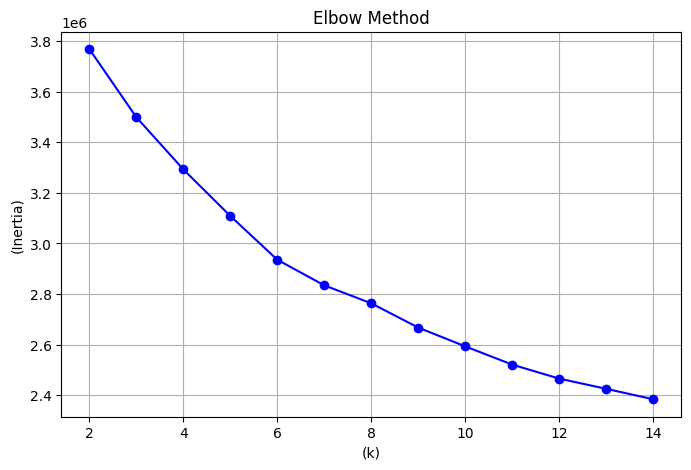

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# فرض: X_encoded از قبل با encoder.predict(X_test) ساخته شده

# اجرای KMeans برای K = 1 تا 10
inertias = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X_encoded)
    inertias.append(kmeans.inertia_)  # مقدار SSE (inertia)

# رسم نمودار Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('(k)')
plt.ylabel('(Inertia)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

<div dir='rtl'>

**شاخص سیلوئت (Silhouette Score)**
- **مکانیسم عملکرد**:  
  این شاخص کیفیت خوشه‌بندی را با ترکیب دو معیار ارزیابی می‌کند:  
  - **فاصله درون خوشه‌ای (a)**: میانگین فاصله هر نقطه از سایر نقاط درون همان خوشه.  
  - **فاصله بین خوشه‌ای (b)**: میانگین فاصله هر نقطه از نزدیک‌ترین خوشه مجاور.  
  - **فرمول**:  
    <div dir='ltr'>

    $$
    [
    Silhouette Score = \frac{(b - a)}{\max(a, b)}
    ]
    $$

    </div>
- **مقدار بهینه**:  
  امتیاز بین **۱-** (خوشه‌بندی ضعیف) تا **۱+** (خوشه‌بندی ایده‌آل) متغیر است. مقدار بالاتر نشان‌دهنده کیفیت بهتر خوشه‌بندی است.  
- **نقاط قوت**:  
  - مناسب برای خوشه‌های نامتقارن و با چگالی متفاوت.  
  - ارائه معیار کمی و عینی برای مقایسه.  
- **نقاط ضعف**:  
  - محاسبات سنگین‌تر نسبت به روش Elbow.  

---

## <a id='toc6_3_'></a>[**مقایسه دو روش**](#toc0_)
| معیار               | روش Elbow                     | شاخص سیلوئت                 |
|---------------------|------------------------------|-----------------------------|
| **سرعت اجرا**       | سریع                        | کندتر                      |
| **دقت در خوشه‌های نامتعارف** | ضعیف                       | قوی                        |
| **ذهنیت در تشخیص**  | بالا (وابسته به دید کاربر)  | پایین (کمی و عینی)         |
| **کاربرد اصلی**     | داده‌های با ساختار ساده     | داده‌های پیچیده و نامتعارف |

---

## <a id='toc6_4_'></a>[**نتیجه‌گیری**](#toc0_)
- **برای دیتاست MNIST**:  
  با توجه به وجود ۱۰ کلاس اصلی (ارقام ۰ تا ۹)، انتظار می‌رود مقدار بهینه `k` نزدیک به ۱۰ باشد. اما بهدلیل همپوشانی برخی ارقام (مانند ۵ و ۶ یا ۳ و ۸)، ممکن است نتایج متفاوت باشد.  
- **تأثیر کاهش ابعاد (PCA)**:  
  استانداردسازی و کاهش ابعاد تا ۹۵٪ واریانس، نویز را حذف می‌کند و محاسبات خوشه‌بندی را تسریع می‌بخشد.  
- **پیشنهاد نهایی**:  
  ترکیب هر دو روش برای تصمیم‌گیری دقیق‌تر و بررسی همزمان نمودارهای Elbow و Silhouette Score.  

</div>

k=4, Silhouette Score=0.1203
k=5, Silhouette Score=0.1180
k=6, Silhouette Score=0.1198
k=7, Silhouette Score=0.1135
k=8, Silhouette Score=0.1102
k=9, Silhouette Score=0.1234
k=10, Silhouette Score=0.1159
k=11, Silhouette Score=0.1191
k=12, Silhouette Score=0.1194
k=13, Silhouette Score=0.1174
k=14, Silhouette Score=0.1162
k=15, Silhouette Score=0.1166
k=16, Silhouette Score=0.1177
k=17, Silhouette Score=0.1173
k=18, Silhouette Score=0.1093
k=19, Silhouette Score=0.1146
k=20, Silhouette Score=0.1140


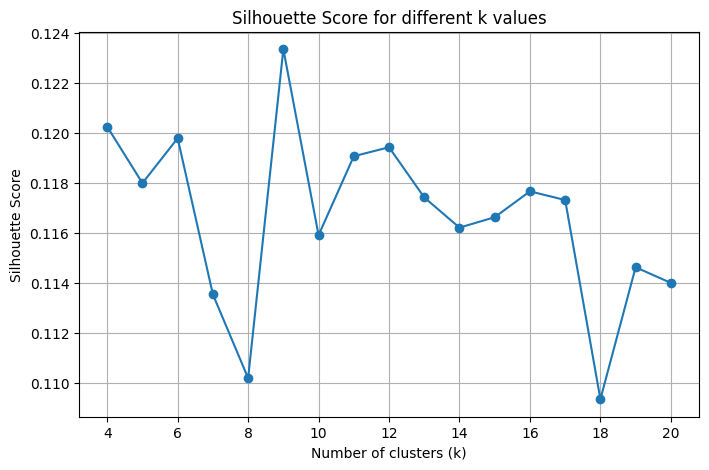

Best number of clusters by Silhouette Score: 9


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = range(4, 21)  # بررسی k از 2 تا 20
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_encoded)
    score = silhouette_score(X_encoded, cluster_labels)
    silhouette_scores.append(score)
    print(f'k={n_clusters}, Silhouette Score={score:.4f}')

# رسم نمودار
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k values')
plt.grid(True)
plt.show()

# بهترین k
best_k = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Best number of clusters by Silhouette Score: {best_k}')


## <a id='toc6_5_'></a>[<div dir ='rtl'>الگوریتم K-means</div>](#toc0_)
<div dir ='rtl'>

**K-Means: رقص ریاضیات در جستجوی همگونی**  
K-Means یکی از **نمادین ترین** الگوریتم های خوشه بندی است که با ترکیبی ساده اما قدرتمند از هندسه و بهینه سازی، دادهها را به گروه های همگن تقسیم میکند. این الگوریتم، مانند یک **کارگردان ریاضی**، با تعریف «مراکز خوشه» (Centroids) و تنظیم تدریجی موقعیت آنها، دادهها را به سمت نزدیک ترین مرکز جذب میکند تا واریانس درون خوشه ها را به حداقل برساند. هدف نهایی آن، ایجاد خوشه هایی است که در آنها فاصلهٔ هر نقطه از مرکز خوشهٔ خود، کمینه شود؛ به بیان ریاضی، کمینهسازی **مجموع مربعات فاصله ها (SSD)** درون هر خوشه:  

<div dir ='ltr'>

$$  
SSD = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2  
$$  

</div>

### <a id='toc6_5_1_'></a>[**مراحل اجرای K-Means: یک بالهٔ محاسباتی**](#toc0_)
۱. **آغازینۀ تصادفی**:  
   الگوریتم با انتخاب تصادفی `k` نقطه به عنوان مراکز اولیه خوشه ها شروع میکند. این مرحله حیاتی است، زیرا انتخاب بدِ مراکز اولیه ممکن است به بهینهٔ محلی (Local Optima) منجر شود.  

۲. **انتساب داده ها**:  
   هر نقطهٔ داده به نزدیک ترین مرکز خوشه منتسب میشود. معیار فاصله معمولاً **اقلیدسی** است، اما بسته به مسئله، معیارهای دیگر نیز استفاده میشوند. این مرحله، مرزهای **مخطط ورونویی (Voronoi Tessellation)** را در فضای داده ترسیم میکند.  

۳. **به روزرسانی مراکز**:  
   مراکز جدید با محاسبه میانگین نقاط هر خوشه تعیین می شوند. این فرآیند، گام کلیدی در کاهش SSD است.  

۴. **تکرار تا همگرایی**:  
   مراحل ۲ و ۳ تا زمانی تکرار میشوند که مراکز خوشه ها ثابت بمانند یا تغییرات به یک آستانهٔ حداقلی برسند.  

---

### <a id='toc6_5_2_'></a>[**نقاط قوت K-Means**:](#toc0_)
- **سادگی و سرعت**: پیادهسازی آسان و اجرای سریع روی دادههای بزرگ.  
- **مقیاس پذیری**: عملکرد مناسب در ابعاد متوسط داده (با پیچیدگی زمانی خطی نسبت به تعداد نمونه ها).  
- **تفسیرپذیری**: مراکز خوشه ها به عنوان نمایندههای آماری، اطلاعات شفافی از هر گروه ارائه میدهند.  

### <a id='toc6_5_3_'></a>[**چالشهای K-Means**:](#toc0_)
- **وابستگی به مراکز اولیه**: ممکن است به بهینه های محلی همگرا شود. راهحل: اجرای الگوریتم با مقداردهی اولیه های متفاوت .  استفاده از روش  k-means++
- **فرض شکل کروی خوشه ها**: در تشخیص خوشه های بیضوی یا با تراکم متغیر ضعیف عمل میکند.  
- **نیاز به تعیین تعداد خوشه ها (k)**: انتخاب نادرست `k` نتایج گمراه کننده ایجاد میکند. ابزارهایی مانند **روش آرنج (Elbow Method)** یا **شاخص سیلوئت (Silhouette Score)** برای تعیین `k` بهینه استفاده میشوند.  

---

### <a id='toc6_5_4_'></a>[**کاربردهای K-Means در جهان واقعی**:](#toc0_)
- **بازاریابی**: تقسیم بندی مشتریان بر اساس رفتار خرید برای طراحی کمپین های هدفمند.  
- **پردازش تصویر**: فشرده سازی رنگ در تصاویر با کاهش تعداد رنگها به `k` رنگ غالب.  
- **کاوش متن**: گروه بندی اسناد بر اساس موضوعات مشترک.  
- **علوم زیستی**: شناسایی زیرگروه های بیماران با الگوهای ژنتیکی یا بالینی مشابه.  

---


</div>

In [33]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 10
start_time = time.time()

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_encoded)

elapsed_time = time.time() - start_time
print(f"K-Means زمان اجرا: {elapsed_time:.2f} ثانیه")
print("Silhouette Score:", silhouette_score(X_encoded, kmeans_labels))


K-Means زمان اجرا: 0.03 ثانیه
Silhouette Score: 0.115910135


## <a id='toc6_6_'></a>[<div dir ='rtl'> تحلیل الگوریتم K-Medoids و پیاده‌سازی آن</div>](#toc0_)
<div dir ='rtl'>


 **مکانیسم عملکرد K-Medoids**
- **هدف اصلی**: خوشه‌بندی داده‌ها با انتخاب **مدوئیدها** (نقاط واقعی در داده‌ها) بهعنوان مرکز خوشه‌ها.  
- **تفاوت کلیدی با K-Means**:  
  - در K-Means از **میانگین** (Centroid) بهعنوان مرکز خوشه استفاده می‌شود.  
  - در K-Medoids از **مدوئید** (Medoid) استفاده می‌شود که یک نقطه واقعی در داده‌هاست.  

---

**مراحل الگوریتم (PAM - Partitioning Around Medoids)**
۱. **انتخاب اولیه مدوئیدها**:  
   - `initial_medoids = np.random.choice(...)`: انتخاب تصادفی `k` نقطه بهعنوان مدوئید اولیه.  
   
۲. **تخصیص نقاط به نزدیک‌ترین مدوئید**:  
   - محاسبه فاصله هر نقطه از مدوئیدها و اختصاص به خوشه‌ای با کمترین فاصله.  

۳. **بهینه‌سازی مدوئیدها**:  
   - برای هر خوشه، نقطهای که کمترین مجموع فاصله از سایر نقاط همان خوشه را دارد، بهعنوان مدوئید جدید انتخاب می‌شود.  
   - تکرار تا رسیدن به همگرایی.  

---

**نقاط قوت و ضعف**
| **نقاط قوت**                          | **نقاط ضعف**                          |
|---------------------------------------|----------------------------------------|
| مقاومت به نویز و داده‌های پرت         | محاسبات سنگین‌تر نسبت به K-Means      |
| عدم تأثیرپذیری از مقیاس ویژگی‌ها      | نیاز به انتخاب اولیه مناسب مدوئیدها   |
| مناسب برای داده‌های غیرعددی           | زمان اجرای بالا برای داده‌های حجیم   |

---

**مقایسه با K-Means**
| **معیار**          | K-Medoids                            | K-Means                              |
|---------------------|--------------------------------------|--------------------------------------|
| **مرکز خوشه**       | مدوئید (نقطه واقعی)                 | سنتروئید (میانگین نقاط)            |
| **مقاومت به نویز**  | بالا                                | پایین                                |
| **سرعت اجرا**       | کند (پیچیدگی محاسباتی O(n²))        | سریع (پیچیدگی O(n))                 |
| **کاربرد**          | داده‌های حاوی نویز/پرت             | داده‌های پیوسته و توزیع‌شده         |

---

</div>

In [3]:
import numpy as np
import time
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics import silhouette_score

# کلاس KMedoids سازگار با scikit-learn
class KMedoidsClustering(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=8, random_state=None):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None

    def fit_predict(self, X, y=None):
        np.random.seed(self.random_state)
        initial_medoids = np.random.choice(len(X), self.n_clusters, replace=False).tolist()
        
        km = kmedoids(X.tolist(), initial_medoids, data_type='points', method='pam')
        km.process()
        
        clusters = km.get_clusters()
        
        self.labels_ = np.full(X.shape[0], -1)
        for cluster_idx, cluster in enumerate(clusters):
            self.labels_[cluster] = cluster_idx
            
        return self.labels_

# اجرای فقط KMedoids
start_time = time.time()

try:
    kmed = KMedoidsClustering(n_clusters=10, random_state=42)
    labels = kmed.fit_predict(X_encoded)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    duration = time.time() - start_time

    if n_clusters > 1 and n_clusters < len(X_encoded):
        sil_score = silhouette_score(X_encoded, labels)
        print(f"KMedoids | زمان: {duration:.2f}s | خوشه‌ها: {n_clusters:2} | Silhouette: {sil_score:.3f}")
    else:
        print(f"KMedoids | زمان: {duration:.2f}s | خوشه‌ها: {n_clusters:2} | وضعیت: نامعتبر")

except Exception as e:
    print(f"KMedoids | خطا: {str(e)}")

KMedoids | زمان: 268.41s | خوشه‌ها: 10 | Silhouette: 0.109


## <a id='toc6_7_'></a>[<div dir ='rtl'>تحلیل الگوریتم BIRCH و پیاده‌سازی آن</div>](#toc0_)

<div dir ='rtl'>


**مکانیسم عملکرد BIRCH**
- **هدف اصلی**: خوشه‌بندی کارآمد داده‌های حجیم با استفاده از **درخت CF** (Clustering Feature Tree).  
- **ویژگی کلیدی**:  
  - **CF-Tree**: ساختار درختی که داده‌ها را به صورت سلسله‌مراتبی خلاصه می‌کند. هر گره شامل **ویژگی‌های خوشه‌ای** (CF) مانند تعداد نقاط، مجموع خطی، و مجموع مربعات است.  
  - **دو فاز اصلی**:  
    ۱. ساخت CF-Tree برای فشرده‌سازی داده‌ها.  
    ۲. اعمال الگوریتم خوشه‌بندی (مانند K-Means) روی برگ‌های درخت.  

---

**مراحل الگوریتم**
۱. **ساخت CF-Tree**:  
   - داده‌ها به صورت افزایشی (incremental) پردازش می‌شوند.  
   - اگر نقطه جدید در محدوده شعاع آستانه (threshold) گره قرار گیرد، به آن گره اضافه می‌شود؛ در غیر این صورت، گره جدید ایجاد می‌شود.  
   
۲. **خوشه‌بندی نهایی**:  
   - برگ‌های CF-Tree بهعنوان «خوشه‌های زیرمجموعه» در نظر گرفته می‌شوند.  
   - از الگوریتم‌های مانند K-Means برای ادغام این خوشه‌ها استفاده می‌شود.  

---

**نقاط قوت و ضعف**
| **نقاط قوت**                          | **نقاط ضعف**                          |
|---------------------------------------|----------------------------------------|
| مناسب برای داده‌های **حجیم** (Big Data) | حساسیت به تنظیم پارامتر **threshold** |
| پیچیدگی زمانی پایین (O(n))            | عملکرد ضعیف برای خوشه‌های غیرکروی     |
| مقاومت به نویز                       | نیاز به تنظیم دستی پارامترها          |

---

**مقایسه با سایر الگوریتم‌ها**
| **معیار**          | BIRCH                                  | K-Means                               | K-Medoids                            |
|---------------------|----------------------------------------|--------------------------------------|--------------------------------------|
| **پیچیدگی زمانی**  | O(n)                                   | O(n)                                 | O(n²)                                |
| **حجم داده**       | مناسب برای داده‌های حجیم             | داده‌های متوسط                     | داده‌های کوچک                     |
| **مقاومت به نویز** | بالا                                   | متوسط                                | بالا                                 |
| **نیاز به تعیین k**| خیر (بهصورت خودکار)                  | بله                                  | بله                                  |

---

</div>

In [ ]:
import time
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

k = 2

start_time = time.time()
birch = Birch(n_clusters=k)
birch_labels = birch.fit_predict(X_encoded)
elapsed_time = time.time() - start_time

print(f"BIRCH زمان اجرا: {elapsed_time:.2f} ثانیه")
print("Silhouette Score:", silhouette_score(X_encoded, birch_labels))


BIRCH زمان اجرا: 3.24 ثانیه
Silhouette Score: 0.14963399


## <a id='toc6_8_'></a>[<div dir ='rtl'> تحلیل الگوریتم DBSCAN و پیاده‌سازی آن](#toc0_)
</div>

<div dir ='rtl'>

**مکانیسم عملکرد DBSCAN**
- **هدف اصلی**: خوشه‌بندی بر اساس **چگالی نقاط** و شناسایی نواحی متراکم.  
- **ویژگی کلیدی**:  
  - نیازی به تعیین تعداد خوشه‌ها (`k`) ندارد.  
  - توانایی تشخیص **نویز** (نقاط پرت) به صورت خودکار.  
  - مناسب برای داده‌هایی با شکل‌های نامتعارف و چگالی متغیر.  

---

**مفاهیم پایه**
۱. **Core Point**: نقطه‌ای که حداقل `min_samples` نقطه در شعاع `eps` اطراف خود دارد.  
۲. **Border Point**: نقطه‌ای که در شعاع `eps` یک Core Point قرار دارد، اما خودش Core Point نیست.  
۳. **Noise Point**: نقاطی که نه Core هستند و نه Border.  

**مراحل الگوریتم**
۱. **انتخاب تصادفی یک نقطه**.  
۲. اگر نقطه **Core Point** باشد:  
   - ایجاد یک خوشه جدید و افزودن تمام نقاط قابل دسترس (مستقیم یا غیرمستقیم) به آن.  
۳. اگر نقطه **Noise** باشد: نادیده گرفتن و ادامه فرآیند.  
۴. تکرار تا پردازش تمام نقاط.  

---

**نقاط قوت و ضعف**
| **نقاط قوت**                          | **نقاط ضعف**                          |
|---------------------------------------|----------------------------------------|
| عدم نیاز به تعیین تعداد خوشه‌ها       | حساسیت به تنظیم پارامترهای `eps` و `min_samples` |
| مقاومت به نویز و داده‌های پرت         | عملکرد ضعیف در داده‌های با چگالی متغیر |
| توانایی تشخیص خوشه‌های نامتعارف      | پیچیدگی محاسباتی بالا برای داده‌های حجیم |

---

**مقایسه با سایر الگوریتم‌ها**
| **معیار**          | DBSCAN                                | K-Means                               | BIRCH                                 |
|---------------------|---------------------------------------|--------------------------------------|--------------------------------------|
| **نیاز به تعیین k** | خیر                                   | بله                                  | خیر (اختیاری)                       |
| **مقاومت به نویز** | بسیار بالا                           | متوسط                                | بالا                                 |
| **پیچیدگی زمانی**  | O(n log n) تا O(n²)                  | O(n)                                 | O(n)                                 |
| **تشخیص شکل‌ها**   | عالی (هر شکل دلخواه)                 | ضعیف (فقط کروی)                     | متوسط                               |

---

</div>

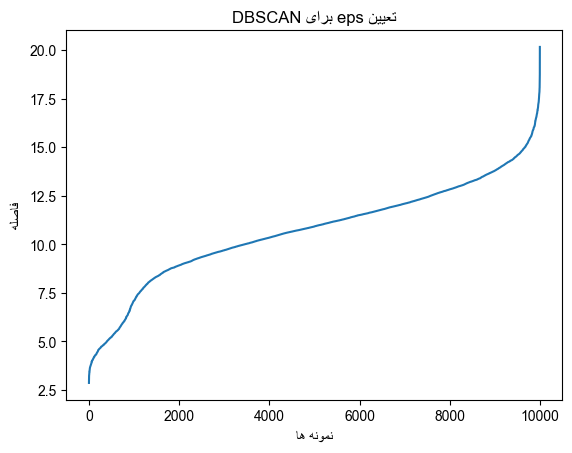

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.sans-serif'] = ['Arial'] 
plt.rcParams['font.family'] = 'Arial'

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)


nn = NearestNeighbors(n_neighbors=5).fit(X_encoded)
distances, _ = nn.kneighbors(X_encoded)

distances = np.sort(distances[:, -1], axis=0)

plt.plot(distances)
plt.xlabel(persian_text('نمونه ها'))   # برچسب محور x به فارسی
plt.ylabel(persian_text('فاصله'))       # برچسب محور y به فارسی
plt.title(persian_text('تعیین eps برای DBSCAN'))  # عنوان نمودار
plt.show();


In [ ]:
from sklearn.cluster import DBSCAN
import time
import numpy as np
from sklearn.metrics import silhouette_score

start_time = time.time()
dbscan = DBSCAN(eps=8, min_samples=20)  
dbscan_labels = dbscan.fit_predict(X_encoded)
elapsed_time = time.time() - start_time

print(f"DBSCAN زمان اجرا: {elapsed_time:.2f} ثانیه")
print("تعداد خوشه ها:", len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Silhouette Score:", silhouette_score(X_encoded, dbscan_labels))



DBSCAN زمان اجرا: 0.07 ثانیه
تعداد خوشه ها: 1
Silhouette Score: 0.061021898


## <a id='toc6_9_'></a>[<div dir ='rtl'> تحلیل الگوریتم OPTICS و پیاده‌سازی آن</div>](#toc0_)
<div dir ='rtl'>


**مکانیسم عملکرد OPTICS**
- **هدف اصلی**: شناسایی خودکار خوشه‌ها در داده‌های با **چگالی متغیر** بدون نیاز به تعیین پارامتر `eps` به صورت دقیق.  
- **ویژگی کلیدی**:  
  - ایجاد **دنباله‌ای از نقاط** (Ordering) بر اساس چگالی محلی.  
  - تولید **نمودار قابلیت دسترسی** (Reachability Plot) برای تشخیص بصری خوشه‌ها.  
  - توانایی تشخیص **سلسله مراتب خوشه‌ها** (خوشه‌های تو در تو).  

---

**مفاهیم پایه**
۱. **Reachability Distance**: حداقل فاصله‌ای که یک نقطه باید از نقاط قبلی در دنباله داشته باشد تا در شعاع `eps` قرار گیرد.  
۲. **Core Distance**: کوچکترین شعاعی که در آن نقطه، حداقل `min_samples` همسایه داشته باشد.  

**مراحل الگوریتم**
۱. **ایجاد دنباله نقاط**: بر اساس چگالی محلی و فاصله دسترسی.  
۲. **تشخیص خوشه‌ها**: با تحلیل شیب‌های ناگهانی در نمودار Reachability.  
۳. **پارامتر `xi`**: تعیین آستانه تغییر شیب برای تشکیل خوشه (مقدار پیشنهادی: ۰.۰۵ تا ۰.۱).  

---

**نقاط قوت و ضعف**
| **نقاط قوت**                          | **نقاط ضعف**                          |
|---------------------------------------|----------------------------------------|
| عدم نیاز به تعیین `eps`               | پیچیدگی محاسباتی بالا (O(n log n))    |
| مناسب برای داده‌های با چگالی متغیر    | حساسیت به تنظیم `min_samples` و `xi`  |
| تشخیص خودکار تعداد خوشه‌ها            | زمان اجرای طولانی نسبت به DBSCAN      |

---

**مقایسه با سایر الگوریتم‌ها**
| **معیار**          | OPTICS                                | DBSCAN                               | K-Means                              |
|---------------------|---------------------------------------|--------------------------------------|--------------------------------------|
| **نیاز به تعیین eps** | خیر                                  | بله                                  | -                                    |
| **تشخیص چگالی متغیر**| عالی                                 | متوسط                               | ضعیف                                |
| **پیچیدگی زمانی**  | O(n log n)                           | O(n log n) تا O(n²)                 | O(n)                                 |
| **تشخیص سلسله مراتب**| بله                                  | خیر                                  | خیر                                  |

---

</div>

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.sans-serif'] = ['Arial'] 
plt.rcParams['font.family'] = 'Arial'
def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

OPTICS زمان اجرا: 15.66 ثانیه
تعداد خوشه ها: 11


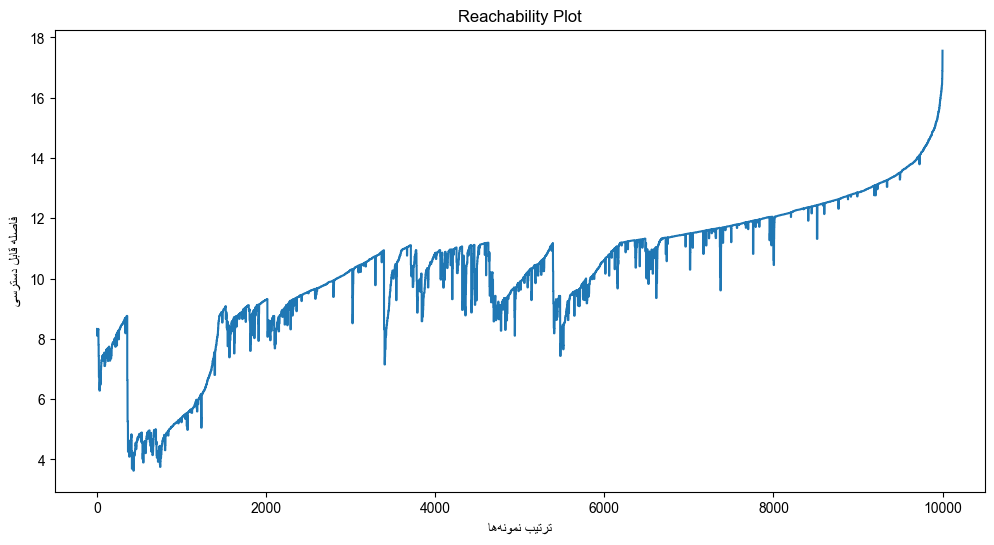

In [ ]:
start_time = time.time()
optics = OPTICS(min_samples=7, xi=0.05)
optics_labels = optics.fit_predict(X_encoded)
print(f"OPTICS زمان اجرا: {time.time() - start_time:.2f} ثانیه")
print("تعداد خوشه ها:", len(np.unique(optics_labels)) - 1)
plt.figure(figsize=(12, 6))
plt.step(np.arange(len(X_encoded)), optics.reachability_[optics.ordering_], where='post')
plt.xlabel(persian_text('ترتیب نمونه‌ها'))
plt.ylabel(persian_text('فاصله قابل دسترسی'))
plt.title('Reachability Plot')
plt.show()

In [ ]:
import numpy as np
import time
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, OPTICS, Birch
from sklearn.datasets import make_blobs  # برای تولید داده نمونه

# کلاس KMedoids سازگار با scikit-learn
class KMedoidsClustering(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=8, random_state=None):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None

    def fit_predict(self, X, y=None):
        np.random.seed(self.random_state)
        initial_medoids = np.random.choice(len(X), self.n_clusters, replace=False).tolist()
        
        km = kmedoids(X.tolist(), initial_medoids, data_type='points', method='pam')
        km.process()
        
        clusters = km.get_clusters()
        
        self.labels_ = np.full(X.shape[0], -1)
        for cluster_idx, cluster in enumerate(clusters):
            self.labels_[cluster] = cluster_idx
            
        return self.labels_



# تنظیم پارامترهای الگوریتم‌ها
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=10, random_state=42),
    "KMedoids": KMedoidsClustering(n_clusters=10, random_state=42),
    "DBSCAN": DBSCAN(eps=8, min_samples=20),
    "OPTICS": OPTICS(min_samples=7, cluster_method='dbscan'),
    "Birch": Birch(n_clusters=10),
}

# اجرای تمام الگوریتم‌ها
for name, algorithm in clustering_algorithms.items():
    start_time = time.time()
    
    try:
        labels = algorithm.fit_predict(X_encoded)
        unique_labels = np.unique(labels)
        n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
        duration = time.time() - start_time
        
        if n_clusters > 1 and n_clusters < len(X_encoded):
            sil_score = silhouette_score(X_encoded, labels)
            print(f"{name:8} | زمان: {duration:.2f}s | خوشه‌ها: {n_clusters:2} | Silhouette: {sil_score:.3f}")
        else:
            print(f"{name:8} | زمان: {duration:.2f}s | خوشه‌ها: {n_clusters:2} | وضعیت: نامعتبر")
            
    except Exception as e:
        print(f"{name:8} | خطا: {str(e)}")

KMeans   | زمان: 0.02s | خوشه‌ها: 10 | Silhouette: 0.125
KMedoids | زمان: 307.25s | خوشه‌ها: 10 | Silhouette: 0.117
DBSCAN   | زمان: 0.07s | خوشه‌ها:  2 | Silhouette: -0.028
OPTICS   | زمان: 14.13s | خوشه‌ها:  0 | وضعیت: نامعتبر
Birch    | زمان: 2.89s | خوشه‌ها: 10 | Silhouette: 0.090


# <a id='toc7_'></a>[<div dir='rtl'>BN learn</div>](#toc0_)

<div dir='rtl'>

در اینجا با استفاده از پیکج BNlearn در زبان برنامه نویسی R به بررسی ساختار یک دیتاست کوچک متوسط و بزرگ می پردازیم 

</div>

# <a id='toc8_'></a>[<div dir='rtl'>دیتاست کوچک</div>](#toc0_)

<img src = 'Screenshot 2025-09-01 135643.png'>

<div dir = 'rtl'>

خروجی آن به شرح زیر است

</div>


<img src='Rplot.png'>

<img src = 'code2.png'>

<div dir = 'rtl'>

خروجی آن به شرح زیر است

</div>


<img src='Rplot01.png' >

<img src='code3.png'>

# <a id='toc9_'></a>[<div dir='rtl'>دیتاست متوسط</div>](#toc0_)

<div dir='rtl'>

به علت نبودن ساختار اصلی دو الگوریتم HC و GS با هم مقایسه شده اند

</div>

<img src = 'code4.png'>

<div dir = 'rtl'>

خروجی آن به شرح زیر است

</div>


<img src='Rplot02.png'>

<img src='code5.png'>

<div dir = 'rtl'>

خروجی آن به شرح زیر است

</div>


<img src='Rplot03.png'>

<img src='code6.png'>

# <a id='toc10_'></a>[<div dir='rtl'>دیتاست بزرگ</div>](#toc0_)

<div dir='rtl'>

به علت نبودن ساختار اصلی دو الگوریتم HC و GS با هم مقایسه شده اند

</div>

<img src = 'code7.png'>

<div dir = 'rtl'>

خروجی آن به شرح زیر است

</div>


<img src='Rplot04.png'>

<img src = 'code8.png'>

<div dir = 'rtl'>

خروجی آن به شرح زیر است

</div>


<img src='Rplot05.png'>

<img src = 'code9.png'>